# Lab 2: Quantum teleportation

앨리스와 밥이 고생중인 문제를 해결할 양자 전송( Quantum Teleportation) 연구소에 오신 것을 환영합니다. 안심하세요! 두 사람의 관계에 대한 문제가 아니니까요. 앨리스는 알 수 없는 상태의 큐비트 $\lvert \psi \rangle$를 가지고 있고, 이 양자 상태를 밥에게 전송하고 싶습니다. 하지만, 그들은 매우 멀리 떨어져 있고 양자 정보를 직접 전달할 적절한 수단이 없으며, 고전적인 정보만 전달할 수 있습니다. 앨리스는 목표를 달성할 수 있을 까요?

앨리스와 밥이 얽힌 큐비트 쌍을 공유하게 된다면, 고전적인 두 비트의 정보를 전송하는 것으로 큐비트 상태를 밥에게 전달할 수 있다는 것이 밝혀졌습니다. 이 과정의 마지막에 밥이 $\lvert \psi \rangle$를 갖게 되고, 앨리스는 더 이상 갖고 있지 않게 되기 때문에 순간이동으로 알려져 있습니다.

## 배경지식

양자 전송은 얽힘과 고전적인 통신을 사용하여 한 큐비트에서 다른 큐비트로 양자 정보를 전송할 수 있는 프로토콜이며, 1993년에 Charles Bennett, Claude Crépeau, Richard Jozsa, Asher Peres, William Wootters가 제안했다. 이 과정은 큐비트 자체를 전송하지 않으면서 소스 큐비트에서 대상 큐비트로 양자 상태를 전송합니다.

이 프로토콜은 세 개의 큐비트를 필요로 합니다:

1. 전송 대상 큐비트 (앨리스의 큐비트)
2. 얽혀 있는 큐비트 쌍의 반쪽 (앨리스의 두번째 큐비트)
3. 얽혀 있는 큐비트 쌍의 나머지 반쪽 (밥의 큐비트)

프로토콜의 진행은 다음과 요약할 수 있습니다:

1. 벨 쌍(Bell Pair)이라 불리는 얽힌 큐비트 쌍을 만들어서 엘리스와 밥에게 나눠줍니다.
2. 앨리스가 그녀의 두개의 큐비트에 대해 벨 기저 측정 (Bell basis measurement)를 진행합니다.
3. 앨리스가 측정으로 얻은 고전 비트를 밥에게 전달합니다.
4. 밥이 앨리스에게 전달받은 비트 정보를 기반으로 벨 쌍의 반쪽에 적절한 양자 게이트 연산을 적용한 후 측정하여 엘리스가 전송한 양자 상태를 얻습니다.

## 구현

양자 비트를 전송하기 위해 앨리스와 밥은 얽힌 큐비트 한 쌍을 누군가가 제공해 주어야 합니다. 
 다음, 앨리스는 자신의 큐비트에 대한 특정 연산을 수행하고 고전적인 통신 채널을 통해 밥과 측정 결과를 공유합니다. 최종적으로, 밥은 앨리스가 전송한 양자 상태를 얻기 위해 그가 가진 얽힌 큐비트에 일련의 연산을 수행합니다. 이제 각 단계를 자세히 살펴봅시다. 

양자 회로는 3개의 큐비트와 3개의 고전적인 비트로 구성됩니다. 큐비트의 이름은 다음과 같습니다:

- $s$: $\lvert \psi \rangle$ 상태를 지닌 "source" 큐비트로, 밥에게 전달하고자 하는 대상.
- $a$: 얽혀있는 큐비트 쌍 중 앨리스가 가진 반쪽의 정보를 담을 큐비트
- $b$: 얽혀있는 큐비트 쌍 중 밥이 가진 반쪽의 정보를 담을 큐비트

전송 프로토콜 자체는 2개의 고전적인 비트가 필요하며, 밥의 큐비트의 최종 상태를 측정하는 데 사용할 세 번째 고전 비트가 추가로 필요합니다. 고전 비트들의 이름은 다음과 같습니다:
- $c0$: 앨리스가 $a$의 측정에 사용할 고전 비트
- $c1$: 앨리스가 $s$의 측정에 사용할 고전 비트
- $c2$: 밥이 $b$의 측정에 사용할 고전 비트

### 연습 1

큐비트 2개를 사용하여 얽힌 벨 쌍 상태 $\frac{\lvert 00 \rangle + \lvert 11 \rangle}{\sqrt{2}}$를 생성합니다. 큐비트 𝑎는 앨리스에게, 큐비트 𝑏는 밥에게 할당 됩니다.

*힌트*: 이 상태는 하다마드 게이트와 CNOT 게이트를 사용해서 구현됩니다. 

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Qubit, Clbit


def create_bell_pair(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    """Creates a bell pair between qubits a and b."""
    qc = QuantumCircuit(qr, cr)
    # unpack qubits
    # the first qubit is s but we won't be using it in this exercise
    _, a, b = qr

    ####### your code goes here #######
    
    qc.h(a)
    qc.cnot(a, b)

    return qc

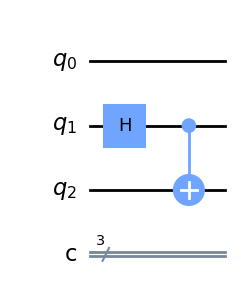

In [2]:
qr = QuantumRegister(3, name="q")
cr = ClassicalRegister(3, name="c")
qc = create_bell_pair(qr, cr)

qc.draw("mpl")

In [3]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex2a

grade_ex2a(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


이제 앨리스는 $a$, 밥은 $b$를 그들이 헤어지기 전 나누어 가졌다고 가정합시다. 어쩌면 앨리스와 밥은 진짜 관계에 문제가 있는 것이었을 지도 모르겠네요 😉.

### 연습 2

프로토콜의 다음 단계를 실행해 봅시다:
1. 앨리스는 CNOT 게이트를 큐비트 $a$에 밥에게 전송하고 싶은 상태인 $\lvert \psi \rangle$를 지닌 큐비트 $s$를 제어 큐비트로 설정하여 적용합니다. 
2. 앨리스는 하다마드 게이트를 $s$에 적용합니다.  


In [4]:
def alice_gates(qr: QuantumRegister, cr: ClassicalRegister):
    """Creates Alices's gates"""
    qc = create_bell_pair(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr

    ####### your code goes here #######

    qc.cnot(s, a)
    qc.h(s)
    
    return qc

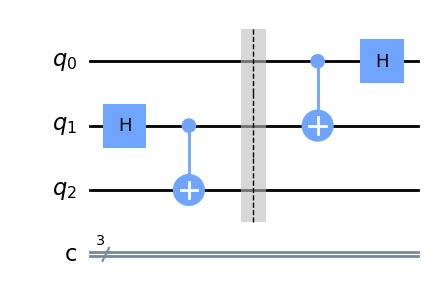

In [5]:
qc = alice_gates(qr, cr)
qc.draw("mpl")

In [6]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex2b

grade_ex2b(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### 연습 3

이제 앨리스는 가지고 있는 두 큐비트에 대해 측정을 수행하고 결과를 두 개의 클래식 비트에 저장합니다. 이어서, 앨리스는 이 결과를 밥에게 전송합니다. 

이어지는 코드셀을 완성하여 앨리스는 큐비트 $a$를 고전 비트 $c0$에, 큐비트 $s$를 고전 비트 $c1$로 측정하도록 합시다.


In [8]:
def measure_and_send(qr: QuantumRegister, cr: ClassicalRegister):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc = alice_gates(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr
    c0, c1, c2 = cr

    ####### your code goes here #######
    
    qc.measure(a, c0)
    qc.measure(s, c1)

    return qc

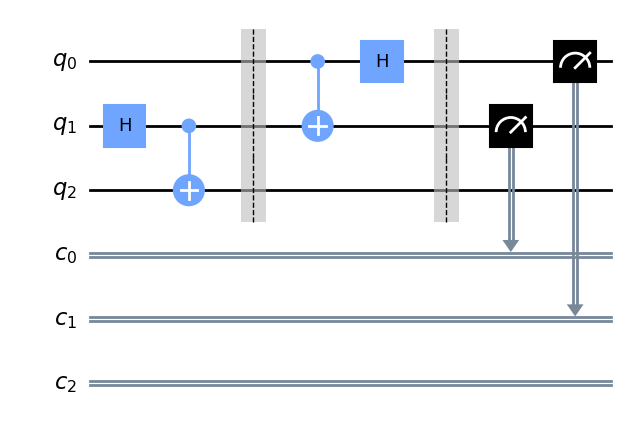

In [9]:
qc = measure_and_send(qr, cr)
qc.draw("mpl", cregbundle=False)

In [10]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex2c

grade_ex2c(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


### 연습 4

이 단계에서, 큐비트 $b$를 가지고 있는 밥은, 앨리스로 받은 고전 비트의 정보에 따라 특정한 양자 게이트를 양자 회로에 추가합니다:

- 비트가 `00`이면 어떠한 양자 게이트도 추가하지 않습니다. 
- 비트가 `01`이면 𝑋 게이트(Pauli-X 또는 비트 플립 게이트라고도 함)를 적용 합니다. 
- 전달 받은 비트가 `10`이라면 𝑍 게이트(Pauli-Z 또는 위상 플립 게이트라고도 함)를 적용해야 합니다. 
- 마지막으로 비트가 `11`이면 𝑍 및 𝑋 게이트를 차례로 적용하는 결합된 𝑍𝑋 게이트를 적용합니다. 


In [11]:
def bob_gates(qr: QuantumRegister, cr: ClassicalRegister):
    """Uses qc.if_test to control which gates are dynamically added"""
    qc = measure_and_send(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr
    c0, c1, c2 = cr

    ####### your code goes here #######

    with qc.if_test((c0, 1)):
        qc.x(b)
    with qc.if_test((c1, 1)):
        qc.z(b)
    
    return qc

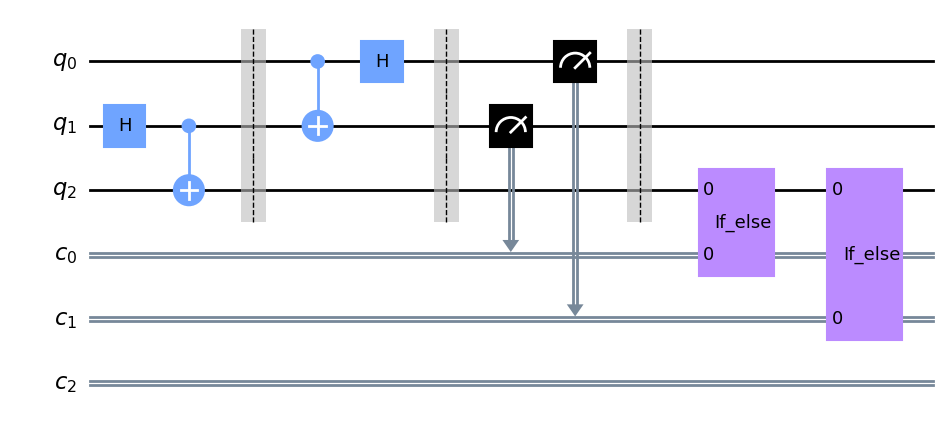

In [12]:
qc = bob_gates(qr, cr)
qc.draw("mpl", cregbundle=False)

In [13]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex2d

grade_ex2d(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


이제 밥은 자신의 큐비트를 클래식 비트 $c2$로 측정합니다. 이 양자 회로에 대해 측정을 여러번 반복한 후 측정된 결과의 통계값을 분석하여 순간 이동이 잘 작동했는지 확인할 수 있습니다. 

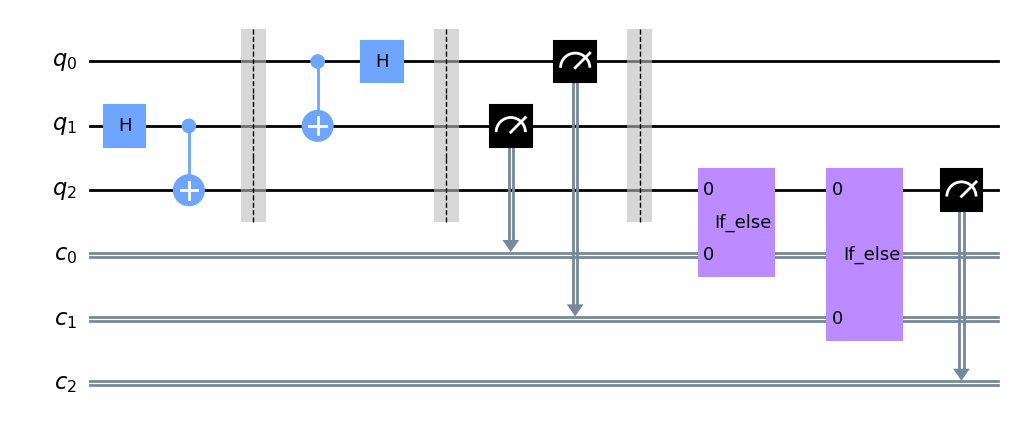

In [14]:
teleportation_circuit = bob_gates(qr, cr)
s, a, b = qr
c0, c1, c2 = cr
teleportation_circuit.measure(b, c2)
teleportation_circuit.draw("mpl")

순간이동 회로가 완성되었으니, 이제 ~~캡틴 Kirk를 이상한 행성의 표면으로 전송~~ 양자 상태를 생성하고 순간이동한 다음 시뮬레이터에서 회로를 실행해 봅시다.

### 연습 5

다음 코드 셀에서 전체 양자 순간이동 회로를 다음의 단계로 `teleport_superposition_circuit` 라는 이름으로 작성합니다. 

- 상태 준비 회로를 작성합니다. 큐비트 $s$를 각도 $\pi / 4$로 $R_x$ 회전을 적용하여 준비합니다.
- 상태 준비 회로와 앞서 제작한 양자 전송 회로와 결합합니다.


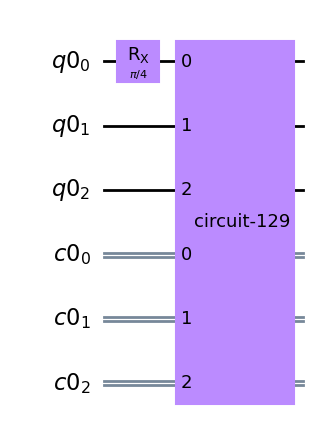

In [15]:
import math

teleport_superposition_circuit: QuantumCircuit

####### your code goes here #######

qr = QuantumRegister(3)
cr = ClassicalRegister(3)
teleport_superposition_circuit = QuantumCircuit(qr, cr)
s, a, b = qr
teleport_superposition_circuit.rx(math.pi/4, s)
teleport_superposition_circuit.append(teleportation_circuit.to_instruction(), [qr[0], qr[1], qr[2]], [cr[0], cr[1], cr[2]])

# Uncomment this line to draw your circuit
teleport_superposition_circuit.draw("mpl", cregbundle=False)

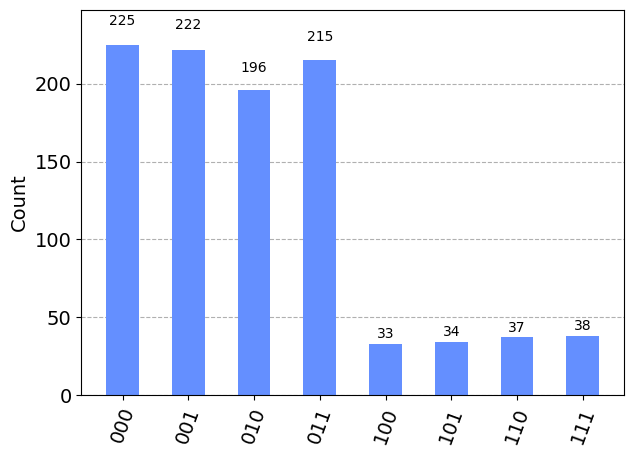

In [16]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

sim = AerSimulator()
transpiled_circuit = transpile(teleport_superposition_circuit, sim)

# run job
shots = 1000
job = sim.run(transpiled_circuit, shots=shots, dynamic=True)

# Get the results and display them
exp_result = job.result()
exp_counts = exp_result.get_counts()
plot_histogram(exp_counts)

이제 밥의 측정 분포 결과만을 얻기 위해 다른 측정된 비트에 대해 한계화(marginalizing)합니다.

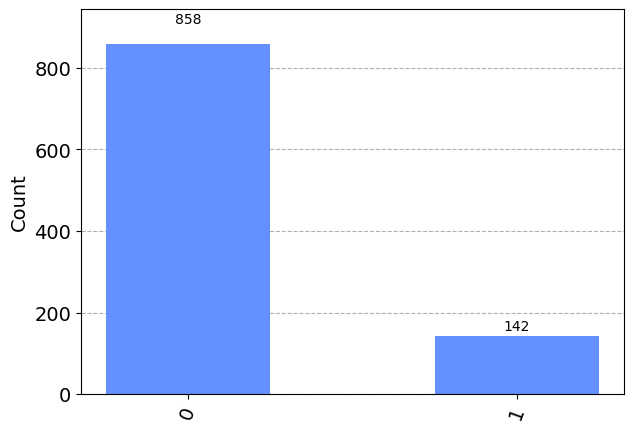

In [17]:
# trace out Bob's results on qubit 2
from qiskit.result import marginal_counts

bobs_counts = marginal_counts(exp_counts, [qr.index(b)])
plot_histogram(bobs_counts)

한계 분포(marginal distribution)은 이상적인 결과에 가까울 것입니다. 

In [18]:
from qc_grader.challenges.spring_2023 import grade_ex2e

grade_ex2e(bobs_counts)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


이제 ~~커크 선장~~ 앨리스의 큐비트가 안전하게 전송되었다고 확인했으니, 이 양자 전송 회로를 실제 하드웨어에서 실행해 봅시다.

In [ ]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider()

In [ ]:
hub = "qc-spring-23-7"
group = "group-3"
project = "rec2LAjkPxmjJDB90"

backend_name = "ibm_peekskill"
backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")

In [ ]:
# backend.target.add_instruction(IfElseOp, name="if_else") # Uncomment if necessary
qc_transpiled = transpile(teleport_superposition_circuit, backend)

In [ ]:
job = backend.run(qc_transpiled, shots=1000, dynamic=True)
job_id = job.job_id()
print(job_id)

실제 백엔드에 실행하는데에는 시간이 필요하므로 일반적으로 job_id를 통해 작업을 시간이 지난 후 불러들여서 사용합니다. 
다음의 코드는 job_id를 통해 작업을 불러들이고 실행 상태를 점검합니다. 사용법은 다음과 같습니다.

In [ ]:
retrieve_job = provider.retrieve_job(job.job_id())
retrieve_job.status()

작업이 완료되었다면 결과를 불러들여봅시다.

In [ ]:
# Get the results and display them
exp_result = retrieve_job.result()
exp_counts = exp_result.get_counts()
plot_histogram(exp_counts)

In [ ]:
# trace out Bob's results on qubit 2
from qiskit.result import marginal_counts

bobs_qubit = 2
bobs_counts = marginal_counts(exp_counts, [bobs_qubit])
plot_histogram(bobs_counts)